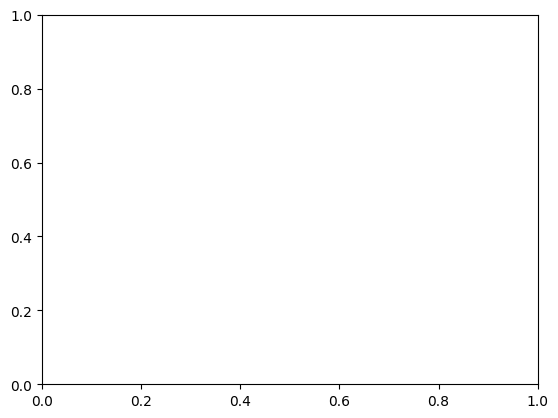

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)])])
a.assemble()

mat = pr.Material("test", gamma = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", gamma = 1, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)


mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)
b = ph.Boundary("Dirichlet", 1)

bcdict = {"Line_0" : ph.Boundary("Neumann", 0),
          "Line_1" : ph.Boundary("Dirichlet", 15),
          "Line_2" : ph.Boundary("Neumann", 0),
          "Line_3" : ph.Boundary("Dirichlet", 0),}

c = ph.HeatTransfer(a, bcdict)
fig, ax = plt.subplots()
comp.setPhysics(c)
node = 6
neighbour = 3
#lines = mesh_c.getNeighbouringFaceLines(node)



#comp.assembly.plot(ax, labels = True)
#mesh_c.plotMesh(ax, vTexts=True)
#lines[neighbour].plot(ax, fmt = "r-")
#line3 expected
#print(a.getCoincidentLineName(lines[neighbour]))

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
[[ 0.39473684  1.18421053  1.97368421  2.76315789  3.55263158  4.34210526
   5.13157895  5.92105263  6.71052632  7.5         8.28947368  9.07894737
   9.86842105 10.65789474 11.44736842 12.23684211 13.02631579 13.81578947
  14.60526316]
 [ 0.39473684  1.18421053  1.97368421  2.76315789  3.55263158  4.34210526
   5.13157895  5.92105263  6.71052632  7.5         8.28947368  9.07894737
   9.86842105 10.65789474 11.44736842 12.23684211 13.02631579 13.81578947
  14.60526316]
 [ 0.39473684  1.18421053  1.97368421  2.76315789  3.55263158  4.34210526
   5.13157895  5.92105263  6.71052632  7.5         8.28947368  9.07894737
   9.86842105 10.65789474 11.44736842 12.23684211 13.02631579 13.81578947
  14.60526316]
 [ 0.39473684  1.18421053  1.97368421  2.76315789  3.55263158  4.34210526
   5.13157895  5.921052

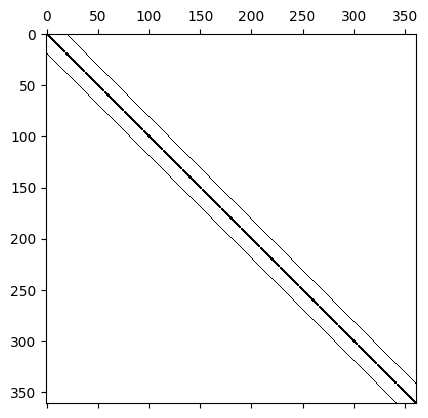

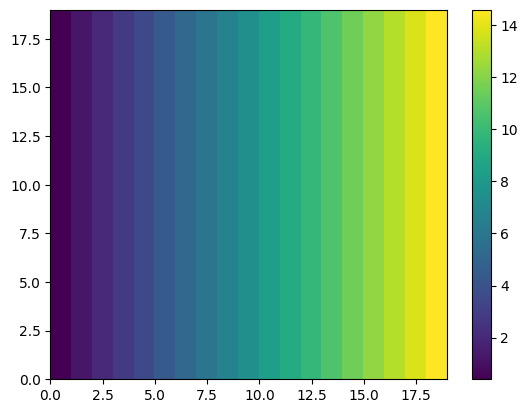

In [2]:
disc = dc.LinearFullDiscretizer(comp)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]
fig, ax = plt.subplots()

pl = plt.pcolor(res)
fig.colorbar(pl)
print(disc.Amrx)
print(res)